# This notebook shows how to design synthetic sequences by using motif implantation.
#### It consists of:
* Performing motif implantation experiments.
* Visualising motif distance preference experiments.
* Replacing motifs on synthetic sequences with weaker ones from IRF4 enhancer.
* Cutting and shortening designed sequences.
#### Luciferase values are in ./data/motif_embedding folder
#### Intermediate files are saved to ./data/motif_embedding folder
#### Figures are saved to ./figures/motif_embedding

### General imports


In [4]:
import sys  
import os
import pickle
import utils
import numpy as np
import scipy
import tensorflow as tf
tf.disable_eager_execution()
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("default")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

### Loading DeepMEL2 data to be used for the initialization of shap.DeepExplainer


In [5]:
print('Loading data...')
f = open('./data/deepmel2/DeepMEL2_nonAugmented_data.pkl', "rb")
nonAugmented_data_dict = pickle.load(f)
f.close()

Loading data...


### Loading the models and initializing shap.DeepExplainer


In [6]:
print('Loading model...')
import shap
tf.disable_eager_execution()
rn=np.random.choice(nonAugmented_data_dict["train_data"].shape[0], 250, replace=False)
model_dict = {}
exp_dict = {} 

name = "deepmel2"
model_json_file = "models/deepmel2/model.json"
model_hdf5_file = "models/deepmel2/model_epoch_07.hdf5"
model_dict[name] = utils.load_model(model_json_file, model_hdf5_file)
exp_dict[name] = shap.DeepExplainer((model_dict[name].inputs, model_dict[name].layers[-1].output), [nonAugmented_data_dict["train_data"][rn],nonAugmented_data_dict["train_data"][rn][:,::-1,::-1]])


name = "deepmel2_gabpa"
model_json_file = "models/deepmel2_gabpa/model.json"
model_hdf5_file = "models/deepmel2_gabpa/model_epoch_09.hdf5"
model_dict[name] = utils.load_model(model_json_file, model_hdf5_file)
exp_dict[name] = shap.DeepExplainer((model_dict[name].inputs, model_dict[name].layers[-1].output), [nonAugmented_data_dict["train_data"][rn],nonAugmented_data_dict["train_data"][rn][:,::-1,::-1]])


name = "deepmel"
model_json_file = "models/deepmel/model.json"
model_hdf5_file = "models/deepmel/model_best_loss.hdf5"
model_dict[name] = utils.load_model(model_json_file, model_hdf5_file)
exp_dict[name] = shap.DeepExplainer((model_dict[name].inputs, model_dict[name].layers[-1].output), [nonAugmented_data_dict["train_data"][rn],nonAugmented_data_dict["train_data"][rn][:,::-1,::-1]])


Loading model...


In [ ]:
nuc_to_onehot = {"A":[1, 0, 0, 0],"C":[0, 1, 0, 0],"G":[0, 0, 1, 0],"T":[0, 0, 0, 1]}

### Defining the TF patterns that are going to be implanted

In [ ]:
patterns_dict = {}
patterns_dict["sox10"] = utils.one_hot_encode_along_row_axis("AACAATGGGCCCATTGTT")
patterns_dict["tfap2"] = utils.one_hot_encode_along_row_axis("GCCTGAGGC")
patterns_dict["mitf"] = utils.one_hot_encode_along_row_axis("GTCACGTGAC")
patterns_dict["runx"] = utils.one_hot_encode_along_row_axis("AACCACA")

### Generating random sequences and implanting the motifs to the best location selected by highest model prediction score 

In [ ]:
# irf4_onehot = utils.one_hot_encode_along_row_axis("AGGGTCGGGCGTGTCCGCCTGTTGGAATATGCTTCTCAGGTCTTCTGGGAAACAGATGTTTTGTGGAAGTGGAAGATTTTGGAAGTAGTGCCTTATCATGTGAAACCACAGGGCAGCTGATCTCTTCAGGCTTTCTTGATGTGAATGACAGCTTTGTTTCATCCACTTTGGTGGGTAAAAGAAGGCAAATTCCCCTGTGGTACTTTTGGTGCCAGGTTTAGCCATATGACGAAGCTTTACATAAAACAGTACAAGTATCTCCATTGTCCTTTATGATCCTCCATGAGTGTTTTCACTTAGTCTGATGAAGGGTTCACTCCAGTCTTTTCGGATGATAAAATGCTTCGGCTGTCAGTCTAATAAGGGATTCCCTGAGGAGTTTGGAGGCTGTAAGAGCACCCCCCGTCTCAATGCCAGTGCTTCTTATCTCAGCCTCTCCTGCACTCCTTTACCCCCGTCTCGATGCCAGTGCTTCCTATCTCAGCCTCTCCTGCACTCCT")
# shuffled_regions = []
# for i in range(2000):
#     np.random.shuffle(irf4_onehot[0])
#     shuffled_regions.append(np.copy(irf4_onehot[0]))
# shuffled_regions = np.array(shuffled_regions)
# pred_2000 = model_dict["deepmel2"].predict([shuffled_regions,shuffled_regions[:,::-1,::-1]])[:,15]
# pred_1834 = pred_2000[pred_2000<0.05]
# shuffled_regions_1834 = shuffled_regions[pred_2000<0.05]

# motif_embedding_dict = {}
# motif_embedding_dict["0"] = {}
# motif_embedding_dict["0"]["regions"] = np.copy(shuffled_regions_1834)
# motif_embedding_dict["s"] = utils.add_pattern_to_best_location(patterns_dict["sox10"], motif_embedding_dict["0"]["regions"], model_dict["deepmel2"], class_no=16)
# motif_embedding_dict["m"] = utils.add_pattern_to_best_location(patterns_dict["mitf"], motif_embedding_dict["0"]["regions"], model_dict["deepmel2"], class_no=16)
# motif_embedding_dict["t"] = utils.add_pattern_to_best_location(patterns_dict["tfap2"], motif_embedding_dict["0"]["regions"], model_dict["deepmel2"], class_no=16)
# motif_embedding_dict["r"] = utils.add_pattern_to_best_location(patterns_dict["runx"], motif_embedding_dict["0"]["regions"], model_dict["deepmel2"], class_no=16)

# motif_embedding_dict["ss"] = utils.add_pattern_to_best_location(patterns_dict["sox10"], motif_embedding_dict["s"]["regions"], model_dict["deepmel2"], class_no=16)
# motif_embedding_dict["sm"] = utils.add_pattern_to_best_location(patterns_dict["mitf"], motif_embedding_dict["s"]["regions"], model_dict["deepmel2"], class_no=16)
# motif_embedding_dict["ms"] = utils.add_pattern_to_best_location(patterns_dict["sox10"], motif_embedding_dict["m"]["regions"], model_dict["deepmel2"], class_no=16)

# motif_embedding_dict["ssm"] = utils.add_pattern_to_best_location(patterns_dict["mitf"], motif_embedding_dict["ss"]["regions"], model_dict["deepmel2"], class_no=16)
# motif_embedding_dict["ssmm"] = utils.add_pattern_to_best_location(patterns_dict["mitf"], motif_embedding_dict["ssm"]["regions"], model_dict["deepmel2"], class_no=16)

# motif_embedding_dict["ssmmt"] = utils.add_pattern_to_best_location(patterns_dict["tfap2"], motif_embedding_dict["ssmm"]["regions"], model_dict["deepmel2"], class_no=16)
# motif_embedding_dict["ssmmtt"] = utils.add_pattern_to_best_location(patterns_dict["tfap2"], motif_embedding_dict["ssmmt"]["regions"], model_dict["deepmel2"], class_no=16)

# motif_embedding_dict["smt"] = utils.add_pattern_to_best_location(patterns_dict["tfap2"], motif_embedding_dict["sm"]["regions"], model_dict["deepmel2"], class_no=16)
# motif_embedding_dict["smtr"] = utils.add_pattern_to_best_location(patterns_dict["runx"], motif_embedding_dict["smt"]["regions"], model_dict["deepmel2"], class_no=16)

# motif_embedding_dict["smts"] = utils.add_pattern_to_best_location(patterns_dict["sox10"], motif_embedding_dict["smt"]["regions"], model_dict["deepmel2"], class_no=16)
# motif_embedding_dict["smtsm"] = utils.add_pattern_to_best_location(patterns_dict["mitf"], motif_embedding_dict["smts"]["regions"], model_dict["deepmel2"], class_no=16)
# motif_embedding_dict["smtsmt"] = utils.add_pattern_to_best_location(patterns_dict["tfap2"], motif_embedding_dict["smtsm"]["regions"], model_dict["deepmel2"], class_no=16)

# for key in motif_embedding_dict:
#     motif_embedding_dict[key]["prediction"] = model_dict["deepmel2"].predict([motif_embedding_dict[key]["regions"],motif_embedding_dict[key]["regions"][:,::-1,::-1]])
    
# import pickle
# f = open("data/motif_embedding/motif_embedding_smtr.pkl", "wb")
# pickle.dump(motif_embedding_dict,f)
# f.close()

In [27]:
import pickle
f = open("data/motif_embedding/motif_embedding_smtr.pkl", "rb")
motif_embedding_dict = pickle.load(f)
f.close()

In [28]:
motif_embedding_dict.keys()

dict_keys(['0', 's', 'm', 't', 'r', 'ss', 'sm', 'ms', 'ssm', 'ssmm', 'ssmmt', 'ssmmtt', 'smt', 'smtr', 'smts', 'smtsm', 'smtsmt'])

### Plotting the prediction scores after each motif implantation steps

Text(0, 0.5, 'Prediction score')

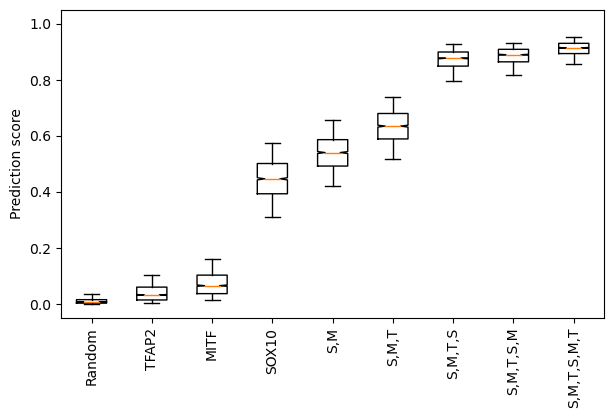

In [29]:
plt.figure(figsize=(7,4))

Topic = 16
_ = plt.boxplot([motif_embedding_dict[key]["prediction"][:,Topic-1] for key in ['0', 't', 'm', 's', 'sm','smt', 'smts', 'smtsm', 'smtsmt']] ,notch=True,showfliers=False, whis=[5,95])
plt.ylim([-0.05,1.05])

_ = plt.xticks(range(1,10),["Random","TFAP2","MITF","SOX10","S,M","S,M,T","S,M,T,S","S,M,T,S,M","S,M,T,S,M,T"],rotation=90)

plt.ylabel("Prediction score")
#plt.savefig("/Users/u0110091/PycharmProjects/EnhancerDesign/figures/boxplot_withdouble.pdf",transparent=True,dpi=300)

### Plotting the implantation location of a TF motif relative to another TF motif.

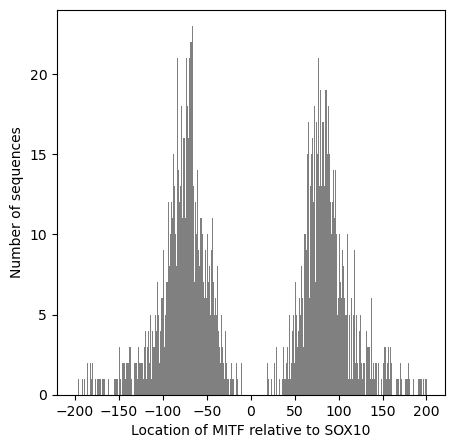

In [30]:
plt.figure(figsize=(5,5))
a = plt.hist(motif_embedding_dict["sm"]["locations"]-motif_embedding_dict["s"]["locations"],bins=401,range=(-200.5,200.5),color="gray")
plt.xlabel("Location of MITF relative to SOX10")
plt.ylabel("Number of sequences")
plt.ylim([0,24])
plt.savefig("figures/motif_embedding/mitf_sox10_distance.pdf",transparent=True)

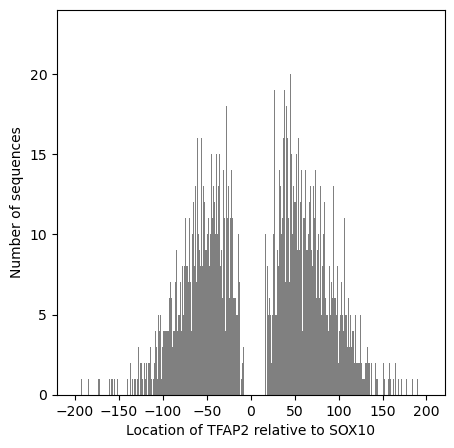

In [31]:
plt.figure(figsize=(5,5))
a = plt.hist(motif_embedding_dict["smt"]["locations"]-motif_embedding_dict["s"]["locations"],bins=401,range=(-200.5,200.5),color="gray")
plt.xlabel("Location of TFAP2 relative to SOX10")
plt.ylabel("Number of sequences")
plt.ylim([0,24])
plt.savefig("figures/motif_embedding/tfap2_sox10_distance.pdf",transparent=True)

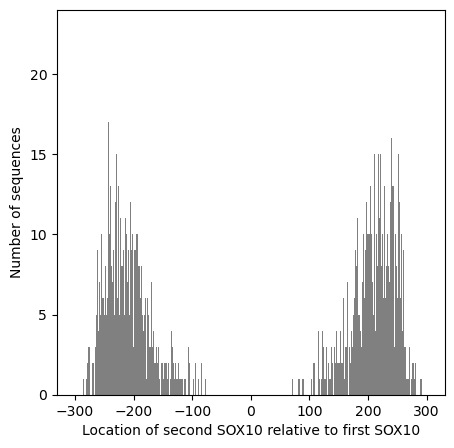

In [32]:
plt.figure(figsize=(5,5))
a = plt.hist(motif_embedding_dict["smts"]["locations"]-motif_embedding_dict["s"]["locations"],bins=601,range=(-300.5,300.5),color="gray")
plt.xlabel("Location of second SOX10 relative to first SOX10")
plt.ylabel("Number of sequences")
plt.ylim([0,24])
plt.savefig("figures/motif_embedding/secondSox10_firstSox10_distance.pdf",transparent=True)

### Function that implant motifs to every possible positions on given sequences

In [61]:
def add_pattern_to_every(pattern, regions, model, topic):
    pattern_added_regions =  np.zeros(regions.shape,dtype="int")
    pattern_locations = np.zeros(regions.shape[0],dtype="int")
    for r, region in enumerate(regions):
        tmp_array = np.zeros((regions.shape[1]-pattern.shape[1]+1,regions.shape[1],regions.shape[2]))
        for nt in range(tmp_array.shape[0]):
            tmp_array[nt] = np.copy(region)
            tmp_array[nt,nt:nt+pattern.shape[1],:] = pattern[0]
        prediction = model.predict([tmp_array,tmp_array[:,::-1,::-1]])[:,topic-1]
    return {"tmp_array":tmp_array, "prediction":prediction}

### Loading flanking sequences in the vector around the tested enhancers and defining the TF patterns that are going to be implanted

In [55]:
upstream_seq = utils.one_hot_encode_along_row_axis("ctcaaggatcttgccgctattgagatccagttcgatatagcccactcttgcacccagttgatcttcagcatcttttactttcaccagcgtttcggggtgtgcaaaaacaggcaagcaaaatgccgcaaagaagggaatgagtgcgacacgaaaatgttggatgctcatactcgtcctttttcaatattattgaagcatttatcagggttactagtacgtctctcaaggataagtaagtaatattaaggtacgggaggtattggacaggccgcaataaaatatctttattttcattacatctgtgtgttggttttttgtgtgaatcgatagtactaacatacgctctccatcaaaacaaaacgaaacaaaacaaactagcaaaataggctgtccccagtgcaagtgcaggtgccagaacatttctctggcctaactggccggtacctgagctcccgtcgacgaattctgcagatatcCAAGTTTGTACAAAAAAGCAGGCT")
downstream_seq = utils.one_hot_encode_along_row_axis("ACCCAGCTTTCTTGTACAAAGTGGgataaacccgctgatcagcctcgactgtgctcgaggatatcaagatctggcctcggcggccaagcttagacactagagggtatataatggaagctcgacttccagcttggcaatccggtactgttggtaaagccaccatggaagatgccaaaaacattaagaagggcccagcgccattctacccactcgaagacgggaccgccggcgagcagctgcacaaagccatgaagcgctacgccctggtgcccggcaccatcgcctttaccgacgcacatatcgaggtggacattacctacgccgagtacttcgagatgagcgttcggctggcagaagctatgaagcgctatgggctgaatacaaaccatcggatcgtggtgtgcagcgagaatagcttgcagttcttcatgcccgtgttgggtgccctgttcatcggtgtggctgtggccccagctaacgacatctacaacgagcgcgag")

patterns_dict = {}
patterns_dict["sox10"] = utils.one_hot_encode_along_row_axis("AACAATGGGCCCATTGTT")
patterns_dict["tfap2"] = utils.one_hot_encode_along_row_axis("GCCTGAGGC")
patterns_dict["mitf"] = utils.one_hot_encode_along_row_axis("GTCACGTGAC")
patterns_dict["runx"] = utils.one_hot_encode_along_row_axis("AACCACA")

patterns_dict_irf4 = {}
patterns_dict_irf4["sox1"] = utils.one_hot_encode_along_row_axis("GTGAATGACAGCTTTGTT")
patterns_dict_irf4["sox2"] = utils.one_hot_encode_along_row_axis("TACAAGTATCTCCATTGT")
patterns_dict_irf4["mitf1"] = utils.one_hot_encode_along_row_axis("ATCATGTGAA")
patterns_dict_irf4["mitf2"] = utils.one_hot_encode_along_row_axis("GCCATATGAC")
patterns_dict_irf4["tfap1"] = utils.one_hot_encode_along_row_axis("TCTTCAGGC")
patterns_dict_irf4["tfap2"] = utils.one_hot_encode_along_row_axis("CCCTGTGGT")

for key in patterns_dict:
    print(key,len(patterns_dict[key][0]))

sox10 18
tfap2 9
mitf 10
runx 7


### Selecting 2 sequences where the motifs are implanted on the upstream side of the sequence

In [69]:
np.where([np.logical_and(
    motif_embedding_dict["smt"]["locations"]>120,
    np.logical_and(motif_embedding_dict["smt"]["locations"]<200,
                   np.logical_and(motif_embedding_dict["s"]["locations"]<150,
                                  motif_embedding_dict["sm"]["locations"]<100)))])[1][:5]

array([ 0,  1, 10, 12, 16])

In [70]:
print("Selected IDs:",*[1,12])

Selected IDs: 1 12


### Plotting nucleotide contribution scores for:
* The initial random sequence
* The SOX, MITF, TFAP motifs implanted once on the random sequence
* The SOX, MITF, TFAP motifs implanted twice on the random sequence
* Strong SOX, MITF, TFAP motifs are replaced with weak ones
  

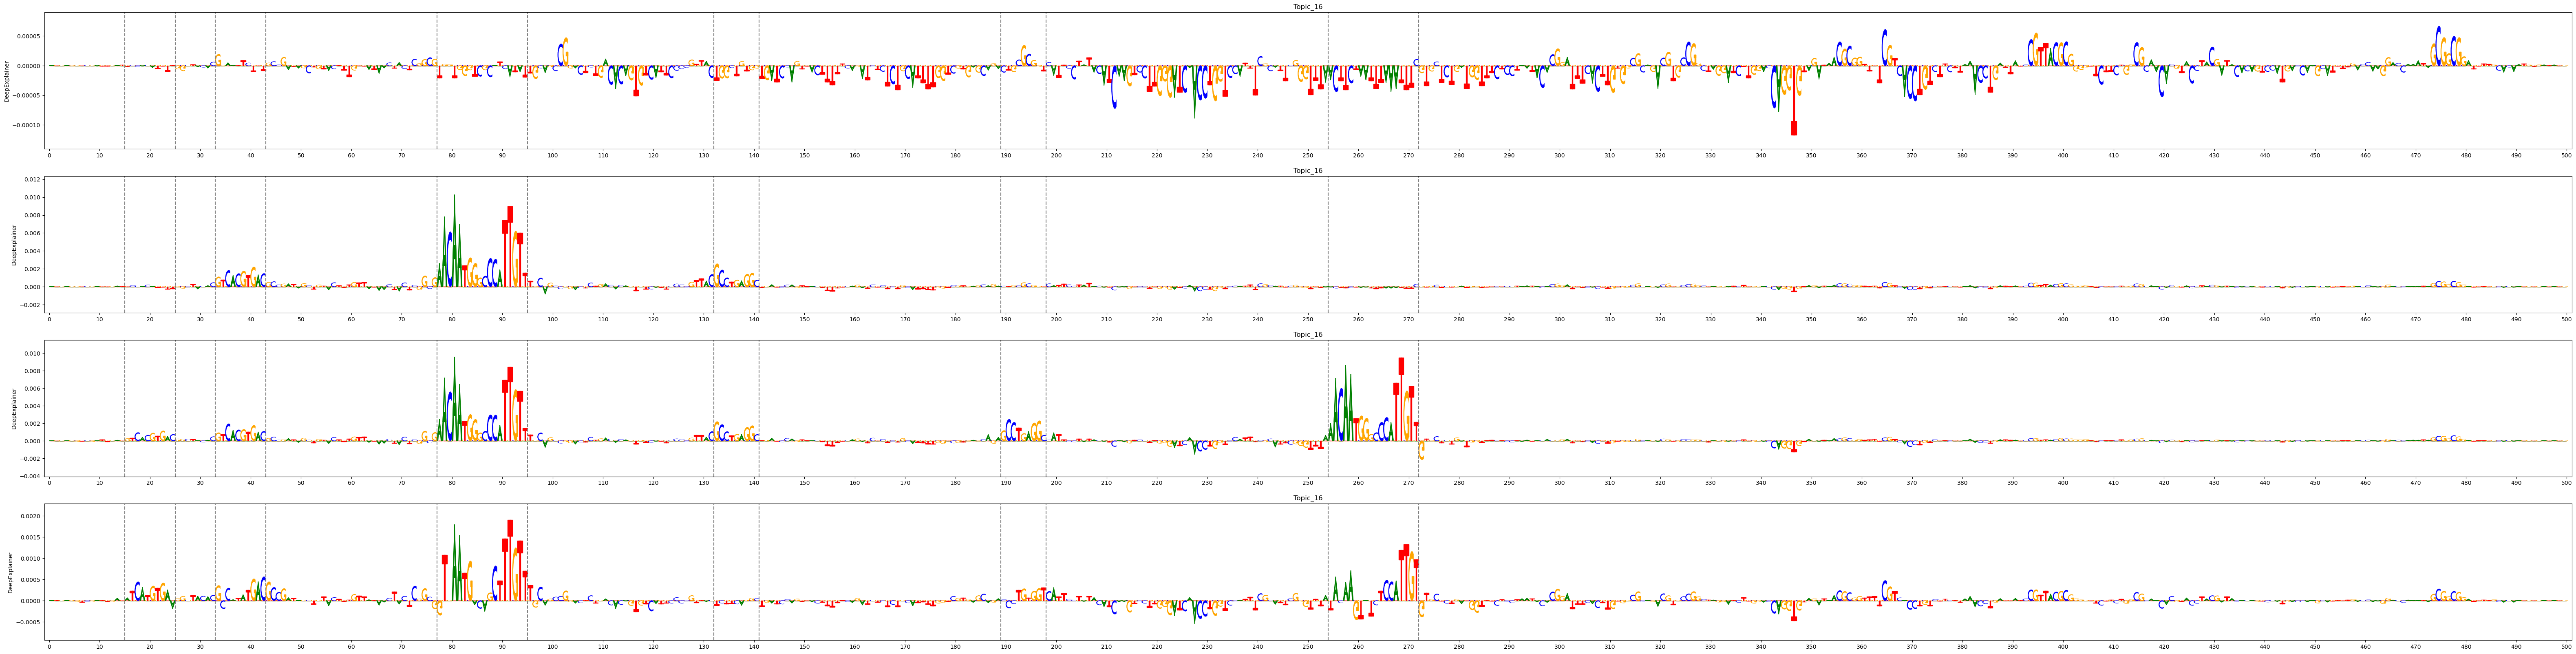

In [58]:
ori_index = 1

ntrack = 4
fig = plt.figure(figsize=(80,ntrack*5))

onehot_  = np.copy(motif_embedding_dict["0"]["regions"][ori_index:ori_index+1])
ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=onehot_, class_no = 16)

onehot_  = np.copy(motif_embedding_dict["smt"]["regions"][ori_index:ori_index+1])
ax2 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=2, seq_onehot=onehot_, class_no = 16)

onehot_  = np.copy(motif_embedding_dict["smtsmt"]["regions"][ori_index:ori_index+1])
ax3 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=3, seq_onehot=onehot_, class_no = 16)

onehot_ = np.copy(motif_embedding_dict_smtsmt["smtsmt"]["regions"][ori_index:ori_index+1])
onehot_[0,motif_embedding_dict["smts"]["locations"][ori_index]:motif_embedding_dict["smts"]["locations"][ori_index]+patterns_dict_irf4["sox2"].shape[1],:] = patterns_dict_irf4["sox2"][0]
onehot_[0,motif_embedding_dict["s"]["locations"][ori_index]:motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict_irf4["sox1"].shape[1],:] = patterns_dict_irf4["sox1"][0]
onehot_[0,motif_embedding_dict["smtsm"]["locations"][ori_index]:motif_embedding_dict["smtsm"]["locations"][ori_index]+patterns_dict_irf4["mitf1"].shape[1],:] = patterns_dict_irf4["mitf1"][0]
onehot_[0,motif_embedding_dict["sm"]["locations"][ori_index]:motif_embedding_dict["sm"]["locations"][ori_index]+patterns_dict_irf4["mitf2"].shape[1],:] = patterns_dict_irf4["mitf2"][0]
onehot_[0,motif_embedding_dict["smtsmt"]["locations"][ori_index]:motif_embedding_dict["smtsmt"]["locations"][ori_index]+patterns_dict_irf4["tfap2"].shape[1],:] = patterns_dict_irf4["tfap2"][0]
onehot_[0,motif_embedding_dict["smt"]["locations"][ori_index]:motif_embedding_dict["smt"]["locations"][ori_index]+patterns_dict_irf4["tfap1"].shape[1],:] = patterns_dict_irf4["tfap1"][0]
ax4 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=4, seq_onehot=onehot_, class_no = 16)


for ax_ in [ax1,ax2,ax3,ax4]:
    ax_.axvline(x=motif_embedding_dict["s"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index]+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index]+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smts"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smts"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smtsm"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smtsm"]["locations"][ori_index]+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smtsmt"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smtsmt"]["locations"][ori_index]+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")
    

plt.savefig("figures/motif_embedding/ME1_rand_single_double_irf4_st0_end500_deepexplainer_topic16.pdf",transparent=True)


### Plotting nucleotide contribution scores for the cut sequences

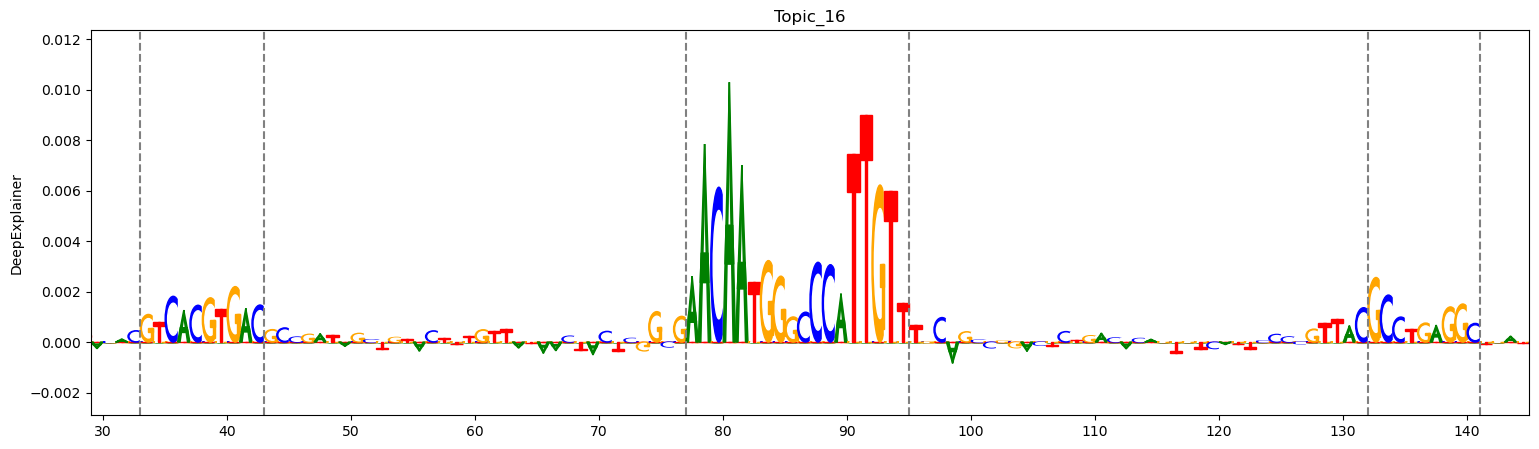

In [59]:
ori_index = 1
st = 29
end = 145

ntrack = 1
fig = plt.figure(figsize=(80/500*(end-st),ntrack*5))

onehot_  = np.copy(motif_embedding_dict["smt"]["regions"][ori_index:ori_index+1])
ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=onehot_, class_no = 16)

ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index]+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index]+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")

ax1.set_xlim([st,end])
plt.savefig("figures/motif_embedding/ME1_cut_st"+str(st)+"_end"+str(end)+"_deepexplainer_topic16.pdf",transparent=True)

### Moving MITF and TFAP motifs as close as possible to SOX motif

TGTTGTCACGTGACGGCGAACAATGGGCCCATTGTTTGGCCTGAGGCTCTG

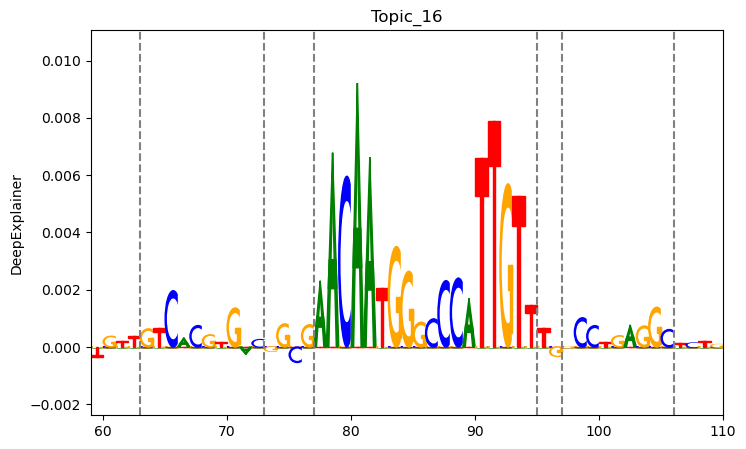

In [64]:
ori_index = 1
onehot_ = np.copy(motif_embedding_dict["s"]["regions"][ori_index:ori_index+1])
res_mitf = add_pattern_to_every(patterns_dict["mitf"], onehot_, model_dict["deepmel2"], topic=16)
onehot_ = np.copy(res_mitf["tmp_array"][63:63+1])
res_tfap = add_pattern_to_every(patterns_dict["tfap2"], onehot_, model_dict["deepmel2"], topic=16)
onehot_ = np.copy(res_tfap["tmp_array"][97:97+1])
st = 63 - 4
end = 97 + 9 + 4


ntrack = 1
fig = plt.figure(figsize=(80/500*(end-st),ntrack*5))
ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=onehot_, class_no = 16)

ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=63,linestyle="--",color="gray")
ax1.axvline(x=63+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=97,linestyle="--",color="gray")
ax1.axvline(x=97+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")

ax1.set_xlim([st,end])
plt.savefig("figures/motif_embedding/ME1_shortened_st"+str(st)+"_end"+str(end)+"_deepexplainer_topic16.pdf",transparent=True)

for nuc in onehot_[0][st:end]:
    if nuc[0]==1:
        print("A",end="")
    if nuc[1]==1:
        print("C",end="")
    if nuc[2]==1:
        print("G",end="")
    if nuc[3]==1:
        print("T",end="")
        


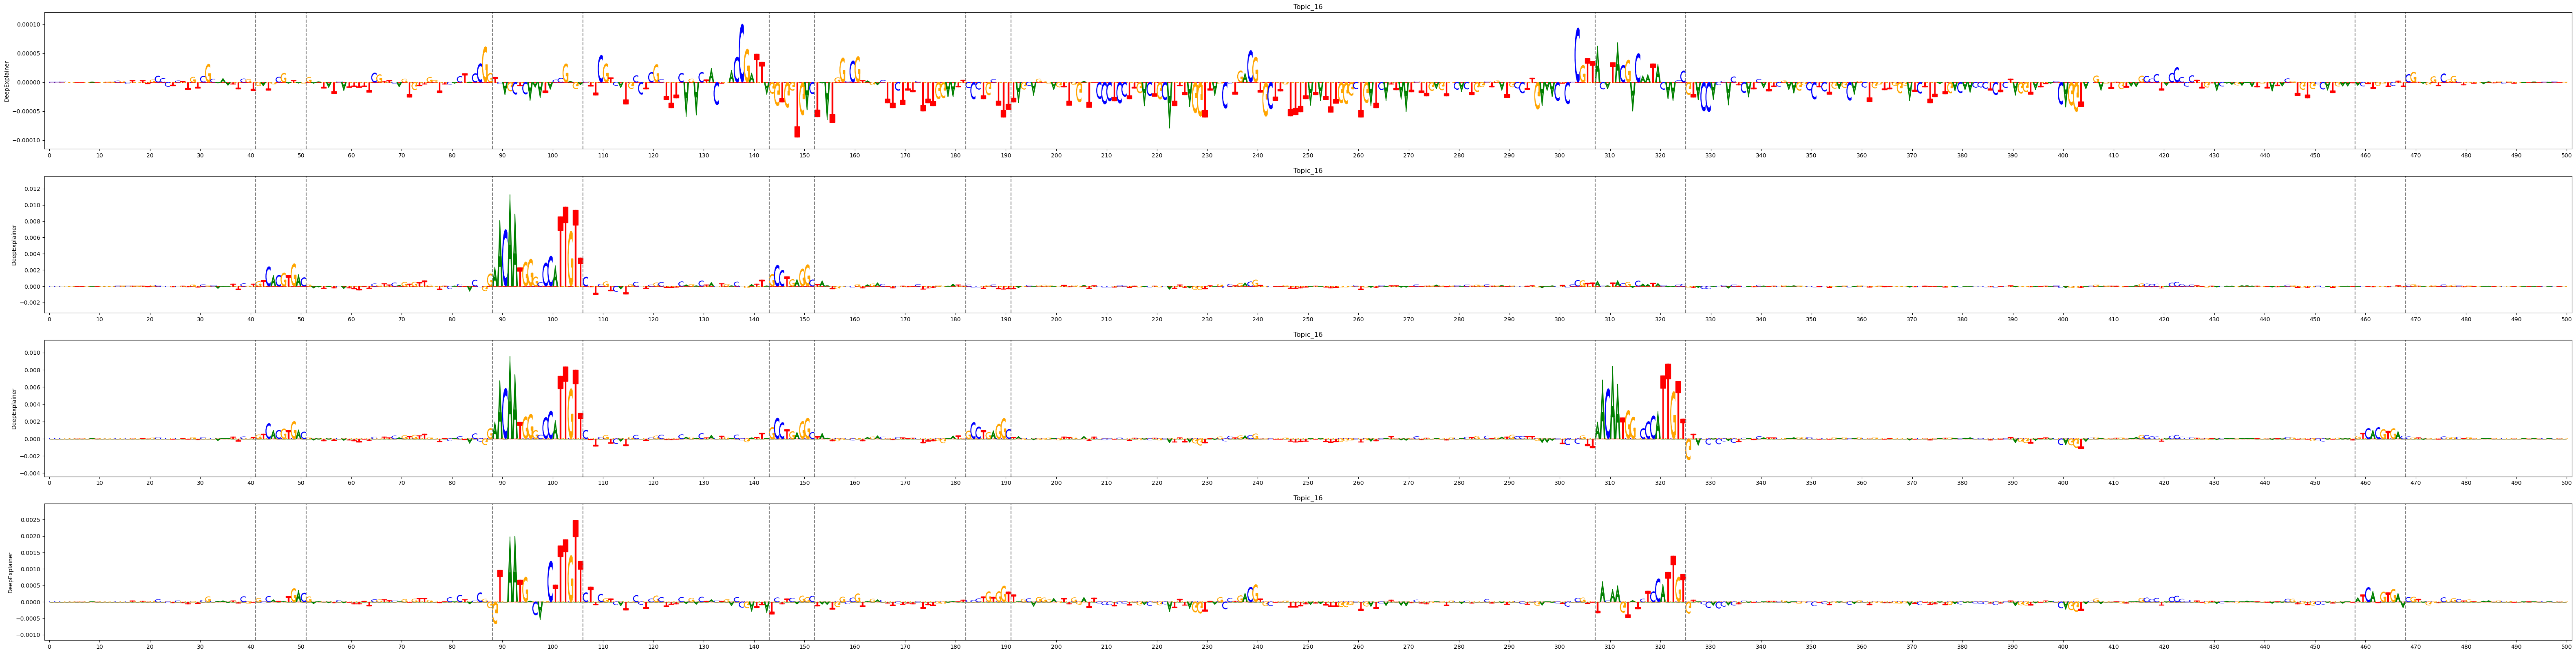

In [66]:
ori_index = 12

ntrack = 4
fig = plt.figure(figsize=(80,ntrack*5))

onehot_  = np.copy(motif_embedding_dict["0"]["regions"][ori_index:ori_index+1])
ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=onehot_, class_no = 16)

onehot_  = np.copy(motif_embedding_dict["smt"]["regions"][ori_index:ori_index+1])
ax2 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=2, seq_onehot=onehot_, class_no = 16)

onehot_  = np.copy(motif_embedding_dict["smtsmt"]["regions"][ori_index:ori_index+1])
ax3 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=3, seq_onehot=onehot_, class_no = 16)

onehot_ = np.copy(motif_embedding_dict_smtsmt["smtsmt"]["regions"][ori_index:ori_index+1])
onehot_[0,motif_embedding_dict["smts"]["locations"][ori_index]:motif_embedding_dict["smts"]["locations"][ori_index]+patterns_dict_irf4["sox2"].shape[1],:] = patterns_dict_irf4["sox2"][0]
onehot_[0,motif_embedding_dict["s"]["locations"][ori_index]:motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict_irf4["sox1"].shape[1],:] = patterns_dict_irf4["sox1"][0]
onehot_[0,motif_embedding_dict["smtsm"]["locations"][ori_index]:motif_embedding_dict["smtsm"]["locations"][ori_index]+patterns_dict_irf4["mitf1"].shape[1],:] = patterns_dict_irf4["mitf1"][0]
onehot_[0,motif_embedding_dict["sm"]["locations"][ori_index]:motif_embedding_dict["sm"]["locations"][ori_index]+patterns_dict_irf4["mitf2"].shape[1],:] = patterns_dict_irf4["mitf2"][0]
onehot_[0,motif_embedding_dict["smtsmt"]["locations"][ori_index]:motif_embedding_dict["smtsmt"]["locations"][ori_index]+patterns_dict_irf4["tfap2"].shape[1],:] = patterns_dict_irf4["tfap2"][0]
onehot_[0,motif_embedding_dict["smt"]["locations"][ori_index]:motif_embedding_dict["smt"]["locations"][ori_index]+patterns_dict_irf4["tfap1"].shape[1],:] = patterns_dict_irf4["tfap1"][0]
ax4 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=4, seq_onehot=onehot_, class_no = 16)


for ax_ in [ax1,ax2,ax3,ax4]:
    ax_.axvline(x=motif_embedding_dict["s"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index]+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index]+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smts"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smts"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smtsm"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smtsm"]["locations"][ori_index]+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smtsmt"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smtsmt"]["locations"][ori_index]+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")
    

plt.savefig("figures/motif_embedding/ME2_rand_single_double_irf4_st0_end500_deepexplainer_topic16.pdf",transparent=True)



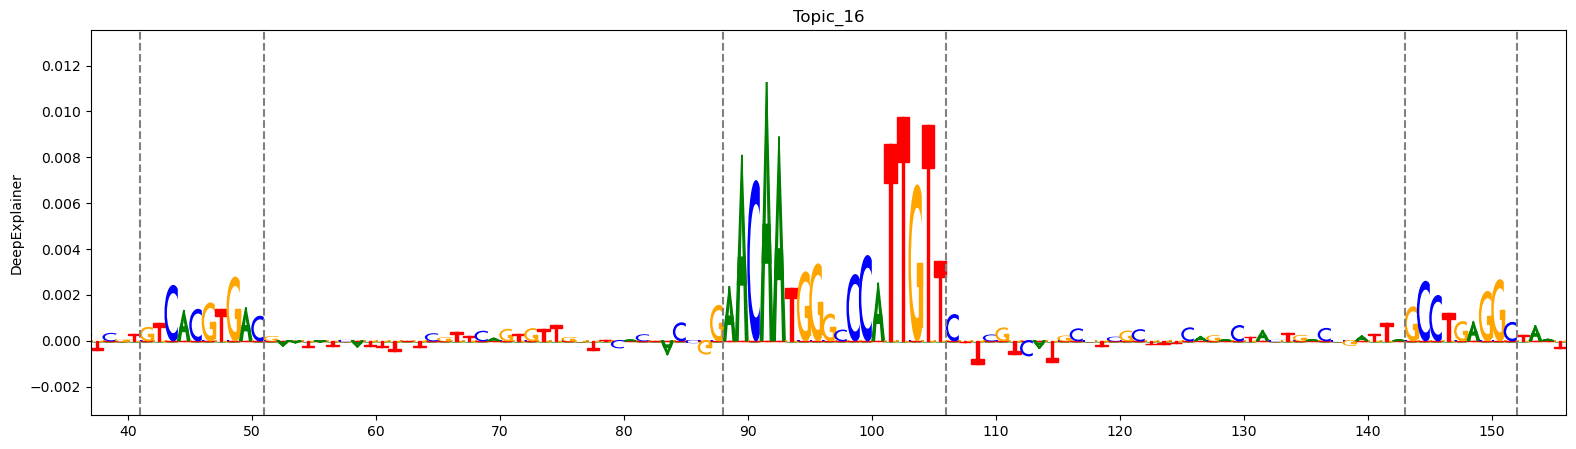

In [67]:
ori_index = 12
st = 37
end = 156

ntrack = 1
fig = plt.figure(figsize=(80/500*(end-st),ntrack*5))

onehot_  = np.copy(motif_embedding_dict["smt"]["regions"][ori_index:ori_index+1])
ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=onehot_, class_no = 16)

ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index]+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index]+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")

ax1.set_xlim([st,end])
plt.savefig("figures/motif_embedding//ME2_cut_st"+str(st)+"_end"+str(end)+"_deepexplainer_topic16.pdf",transparent=True)

TTTTGTCACGTGACTGGTTCACTACCGGAACAATGGGCCCATTGTTCTTCGGCCTGAGGCGCTT

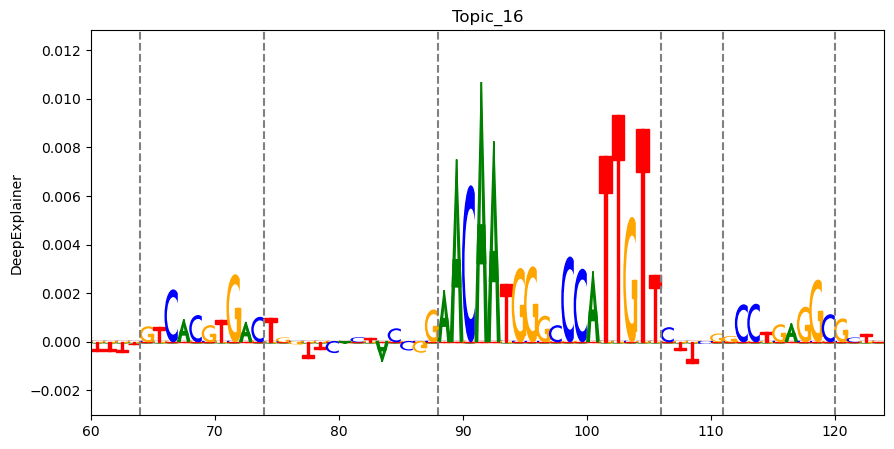

In [68]:
ori_index = 12
onehot_ = np.copy(motif_embedding_dict["s"]["regions"][ori_index:ori_index+1])
res_mitf = add_pattern_to_every(patterns_dict["mitf"], onehot_, model_dict["deepmel2"], topic=16)
onehot_ = np.copy(res_mitf["tmp_array"][64:64+1])
res_tfap = add_pattern_to_every(patterns_dict["tfap2"], onehot_, model_dict["deepmel2"], topic=16)
onehot_ = np.copy(res_tfap["tmp_array"][111:111+1])
st = 64 - 4
end = 111 + 9 + 4

ntrack = 1
fig = plt.figure(figsize=(80/500*(end-st),ntrack*5))
ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=onehot_, class_no = 16)

ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=64,linestyle="--",color="gray")
ax1.axvline(x=64+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=111,linestyle="--",color="gray")
ax1.axvline(x=111+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")

ax1.set_xlim([st,end])
plt.savefig("figures/motif_embedding/ME2_shortened_st"+str(st)+"_end"+str(end)+"_deepexplainer_topic16.pdf",transparent=True)


for nuc in onehot_[0][st:end]:
    if nuc[0]==1:
        print("A",end="")
    if nuc[1]==1:
        print("C",end="")
    if nuc[2]==1:
        print("G",end="")
    if nuc[3]==1:
        print("T",end="")

### Selecting 2 sequences where the motifs are implanted on the upstream side of the sequence

In [74]:
np.where([np.logical_and(
    motif_embedding_dict["smt"]["locations"]>260,
    np.logical_and(motif_embedding_dict["smt"]["locations"]<360,
                   np.logical_and(motif_embedding_dict["sm"]["locations"]>400,
                                  motif_embedding_dict["s"]["locations"]>330)))])[1][:15]

array([ 5,  7,  8, 11, 17, 20, 25, 37, 45, 47, 50, 51, 54, 58, 60])

In [75]:
print("Selected IDs:",*[17,58])

Selected IDs: 17 58


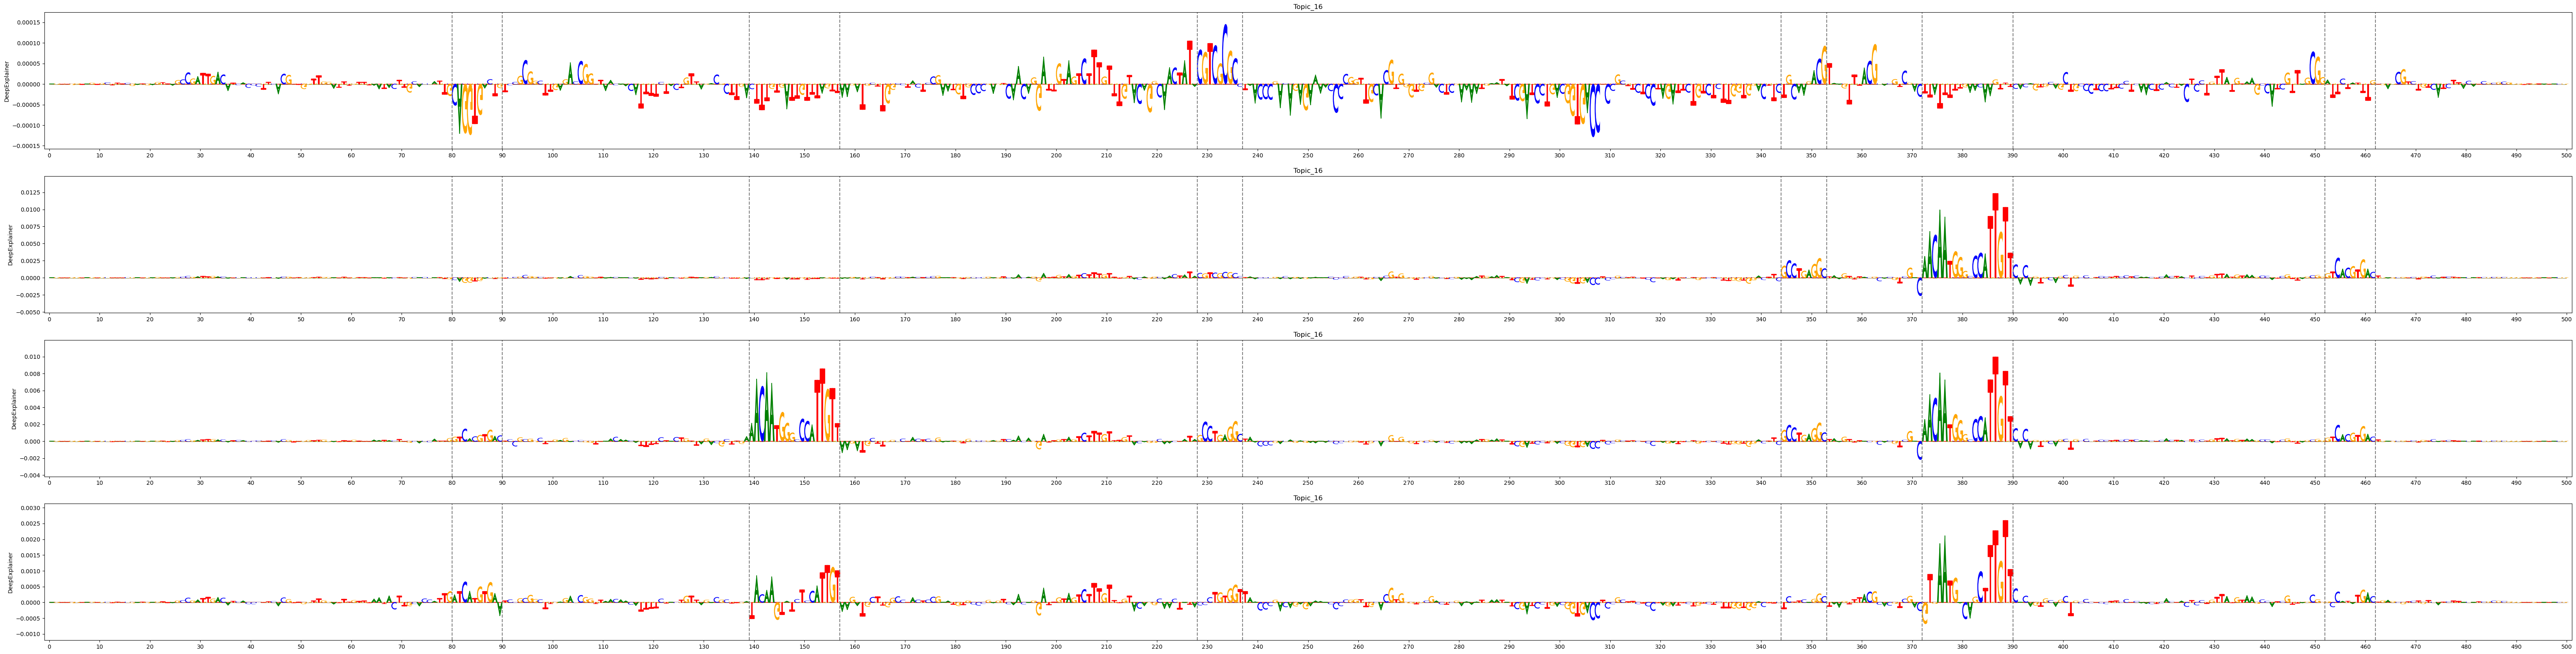

In [76]:
ori_index = 17

ntrack = 4
fig = plt.figure(figsize=(80,ntrack*5))

onehot_  = np.copy(motif_embedding_dict["0"]["regions"][ori_index:ori_index+1])
ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=onehot_, class_no = 16)

onehot_  = np.copy(motif_embedding_dict["smt"]["regions"][ori_index:ori_index+1])
ax2 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=2, seq_onehot=onehot_, class_no = 16)

onehot_  = np.copy(motif_embedding_dict["smtsmt"]["regions"][ori_index:ori_index+1])
ax3 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=3, seq_onehot=onehot_, class_no = 16)

onehot_ = np.copy(motif_embedding_dict_smtsmt["smtsmt"]["regions"][ori_index:ori_index+1])
onehot_[0,motif_embedding_dict["smts"]["locations"][ori_index]:motif_embedding_dict["smts"]["locations"][ori_index]+patterns_dict_irf4["sox2"].shape[1],:] = patterns_dict_irf4["sox2"][0]
onehot_[0,motif_embedding_dict["s"]["locations"][ori_index]:motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict_irf4["sox1"].shape[1],:] = patterns_dict_irf4["sox1"][0]
onehot_[0,motif_embedding_dict["smtsm"]["locations"][ori_index]:motif_embedding_dict["smtsm"]["locations"][ori_index]+patterns_dict_irf4["mitf1"].shape[1],:] = patterns_dict_irf4["mitf1"][0]
onehot_[0,motif_embedding_dict["sm"]["locations"][ori_index]:motif_embedding_dict["sm"]["locations"][ori_index]+patterns_dict_irf4["mitf2"].shape[1],:] = patterns_dict_irf4["mitf2"][0]
onehot_[0,motif_embedding_dict["smtsmt"]["locations"][ori_index]:motif_embedding_dict["smtsmt"]["locations"][ori_index]+patterns_dict_irf4["tfap2"].shape[1],:] = patterns_dict_irf4["tfap2"][0]
onehot_[0,motif_embedding_dict["smt"]["locations"][ori_index]:motif_embedding_dict["smt"]["locations"][ori_index]+patterns_dict_irf4["tfap1"].shape[1],:] = patterns_dict_irf4["tfap1"][0]
ax4 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=4, seq_onehot=onehot_, class_no = 16)


for ax_ in [ax1,ax2,ax3,ax4]:
    ax_.axvline(x=motif_embedding_dict["s"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index]+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index]+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smts"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smts"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smtsm"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smtsm"]["locations"][ori_index]+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smtsmt"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smtsmt"]["locations"][ori_index]+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")
    

plt.savefig("figures/motif_embedding/ME3_rand_single_double_irf4_st0_end500_deepexplainer_topic16.pdf",transparent=True)


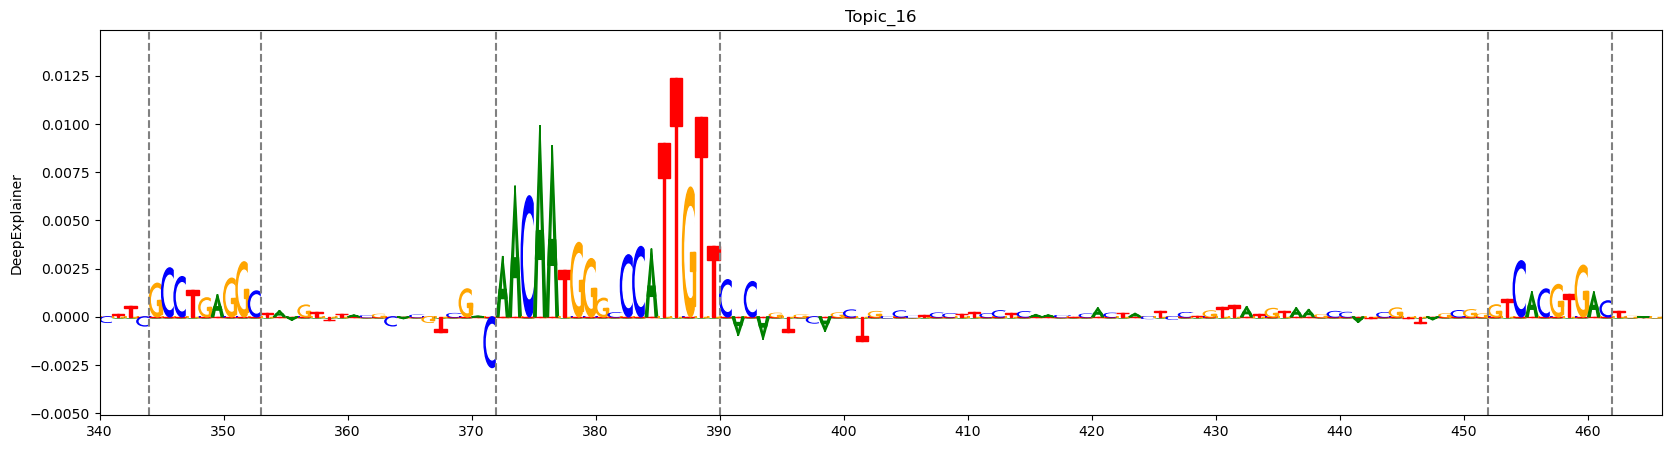

In [77]:
ori_index = 17
st = 340
end = 466

ntrack = 1
fig = plt.figure(figsize=(80/500*(end-st),ntrack*5))

onehot_  = np.copy(motif_embedding_dict["smt"]["regions"][ori_index:ori_index+1])
ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=onehot_, class_no = 16)

ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index]+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index]+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")

ax1.set_xlim([st,end])
plt.savefig("figures/motif_embedding/ME3_cut_st"+str(st)+"_end"+str(end)+"_deepexplainer_topic16.pdf",transparent=True)

TACGGCCTGAGGCAACAATGGGCCCATTGTTCACAGTGCAGCTGCCCGTCACGTGACACTC

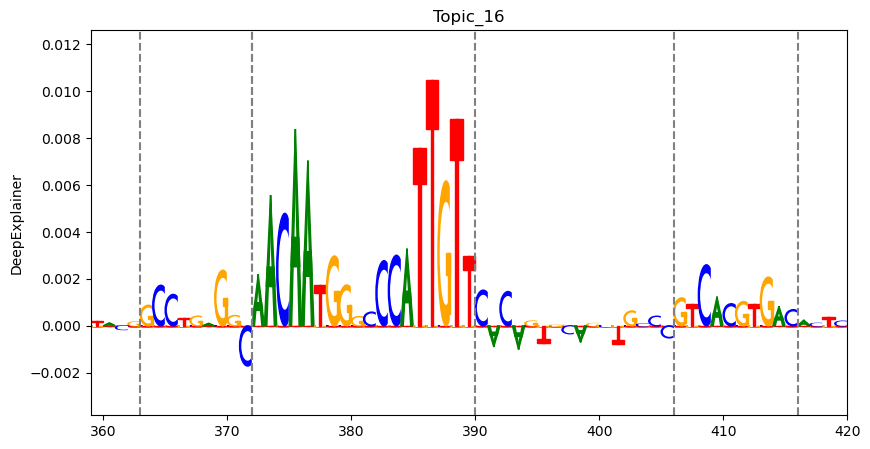

In [78]:
ori_index = 17
onehot_ = np.copy(motif_embedding_dict["s"]["regions"][ori_index:ori_index+1])
res_mitf = add_pattern_to_every(patterns_dict["mitf"], onehot_, model_dict["deepmel2"], topic=16)
onehot_ = np.copy(res_mitf["tmp_array"][406:406+1])
res_tfap = add_pattern_to_every(patterns_dict["tfap2"], onehot_, model_dict["deepmel2"], topic=16)
onehot_ = np.copy(res_tfap["tmp_array"][363:363+1])
st = 363 - 4
end = 406 + 10 + 4

ntrack = 1
fig = plt.figure(figsize=(80/500*(end-st),ntrack*5))
ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=onehot_, class_no = 16)

ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=406,linestyle="--",color="gray")
ax1.axvline(x=406+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=363,linestyle="--",color="gray")
ax1.axvline(x=363+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")

ax1.set_xlim([st,end])
plt.savefig("figures/motif_embedding/ME3_shortened_st"+str(st)+"_end"+str(end)+"_deepexplainer_topic16.pdf",transparent=True)



for nuc in onehot_[0][st:end]:
    if nuc[0]==1:
        print("A",end="")
    if nuc[1]==1:
        print("C",end="")
    if nuc[2]==1:
        print("G",end="")
    if nuc[3]==1:
        print("T",end="")

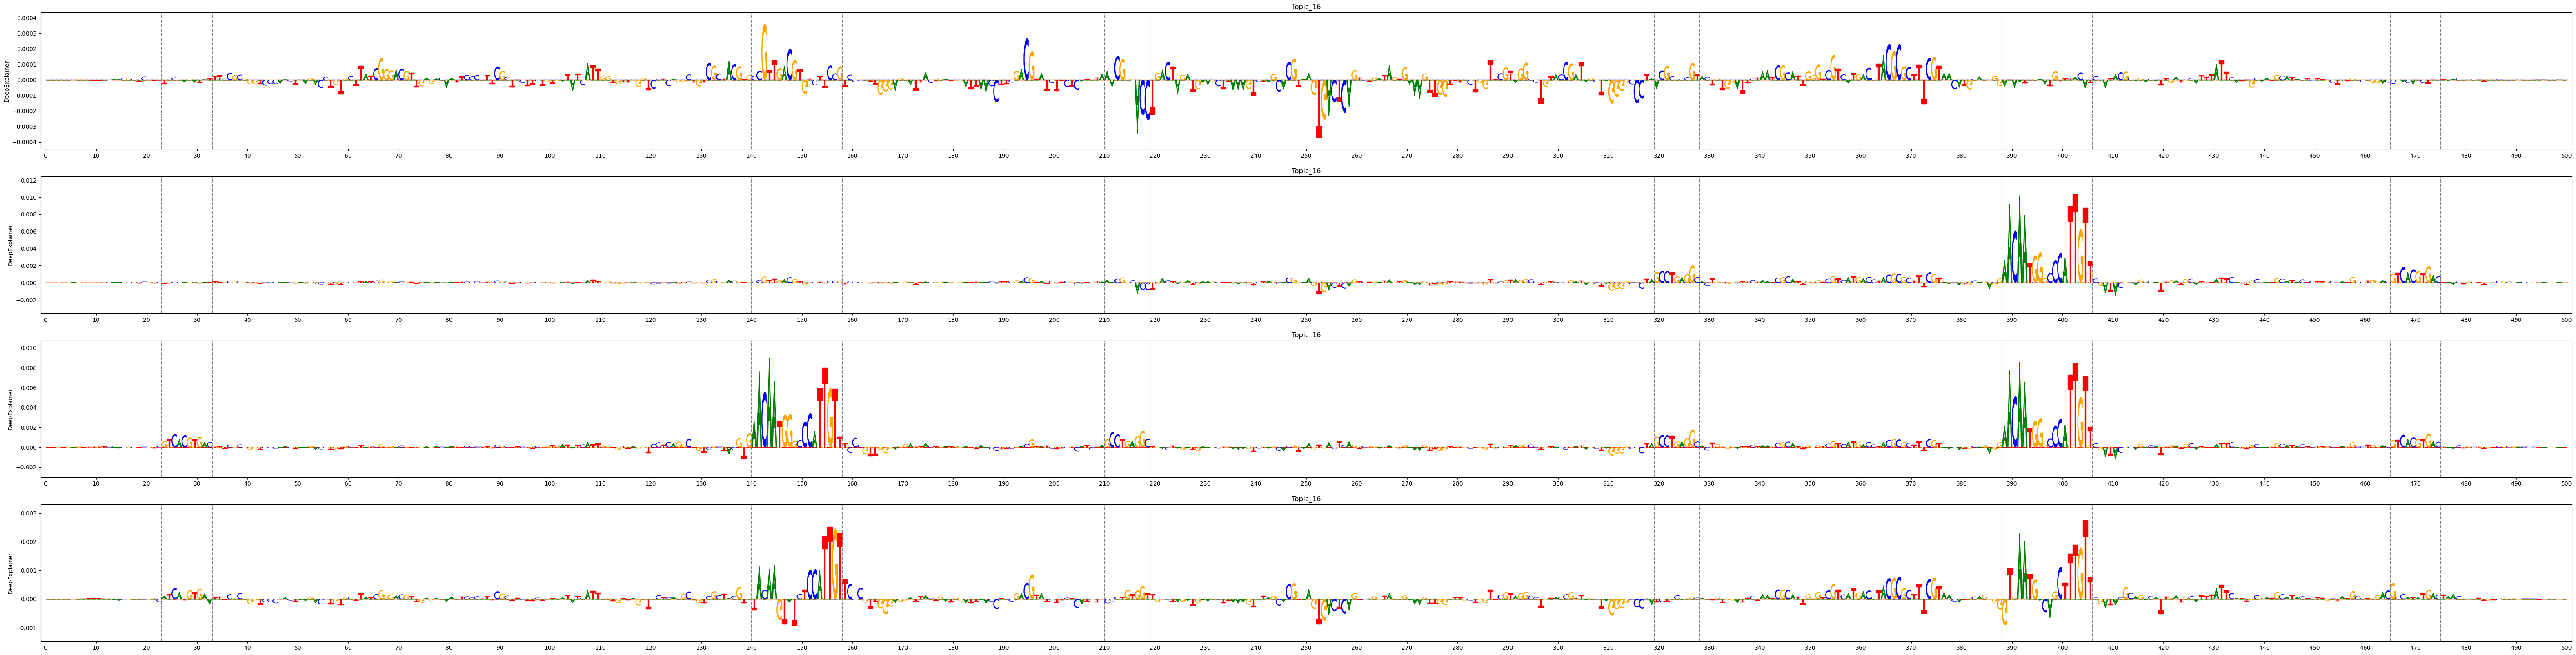

In [79]:
ori_index = 58

ntrack = 4
fig = plt.figure(figsize=(80,ntrack*5))

onehot_  = np.copy(motif_embedding_dict["0"]["regions"][ori_index:ori_index+1])
ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=onehot_, class_no = 16)

onehot_  = np.copy(motif_embedding_dict["smt"]["regions"][ori_index:ori_index+1])
ax2 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=2, seq_onehot=onehot_, class_no = 16)

onehot_  = np.copy(motif_embedding_dict["smtsmt"]["regions"][ori_index:ori_index+1])
ax3 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=3, seq_onehot=onehot_, class_no = 16)

onehot_ = np.copy(motif_embedding_dict_smtsmt["smtsmt"]["regions"][ori_index:ori_index+1])
onehot_[0,motif_embedding_dict["smts"]["locations"][ori_index]:motif_embedding_dict["smts"]["locations"][ori_index]+patterns_dict_irf4["sox2"].shape[1],:] = patterns_dict_irf4["sox2"][0]
onehot_[0,motif_embedding_dict["s"]["locations"][ori_index]:motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict_irf4["sox1"].shape[1],:] = patterns_dict_irf4["sox1"][0]
onehot_[0,motif_embedding_dict["smtsm"]["locations"][ori_index]:motif_embedding_dict["smtsm"]["locations"][ori_index]+patterns_dict_irf4["mitf1"].shape[1],:] = patterns_dict_irf4["mitf1"][0]
onehot_[0,motif_embedding_dict["sm"]["locations"][ori_index]:motif_embedding_dict["sm"]["locations"][ori_index]+patterns_dict_irf4["mitf2"].shape[1],:] = patterns_dict_irf4["mitf2"][0]
onehot_[0,motif_embedding_dict["smtsmt"]["locations"][ori_index]:motif_embedding_dict["smtsmt"]["locations"][ori_index]+patterns_dict_irf4["tfap2"].shape[1],:] = patterns_dict_irf4["tfap2"][0]
onehot_[0,motif_embedding_dict["smt"]["locations"][ori_index]:motif_embedding_dict["smt"]["locations"][ori_index]+patterns_dict_irf4["tfap1"].shape[1],:] = patterns_dict_irf4["tfap1"][0]
ax4 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=4, seq_onehot=onehot_, class_no = 16)

for ax_ in [ax1,ax2,ax3,ax4]:
    ax_.axvline(x=motif_embedding_dict["s"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index]+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index]+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smts"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smts"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smtsm"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smtsm"]["locations"][ori_index]+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")
    
    ax_.axvline(x=motif_embedding_dict["smtsmt"]["locations"][ori_index],linestyle="--",color="gray")
    ax_.axvline(x=motif_embedding_dict["smtsmt"]["locations"][ori_index]+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")
        
plt.savefig("figures/motif_embedding/ME4_rand_single_double_irf4_st0_end500_deepexplainer_topic16.pdf",transparent=True)

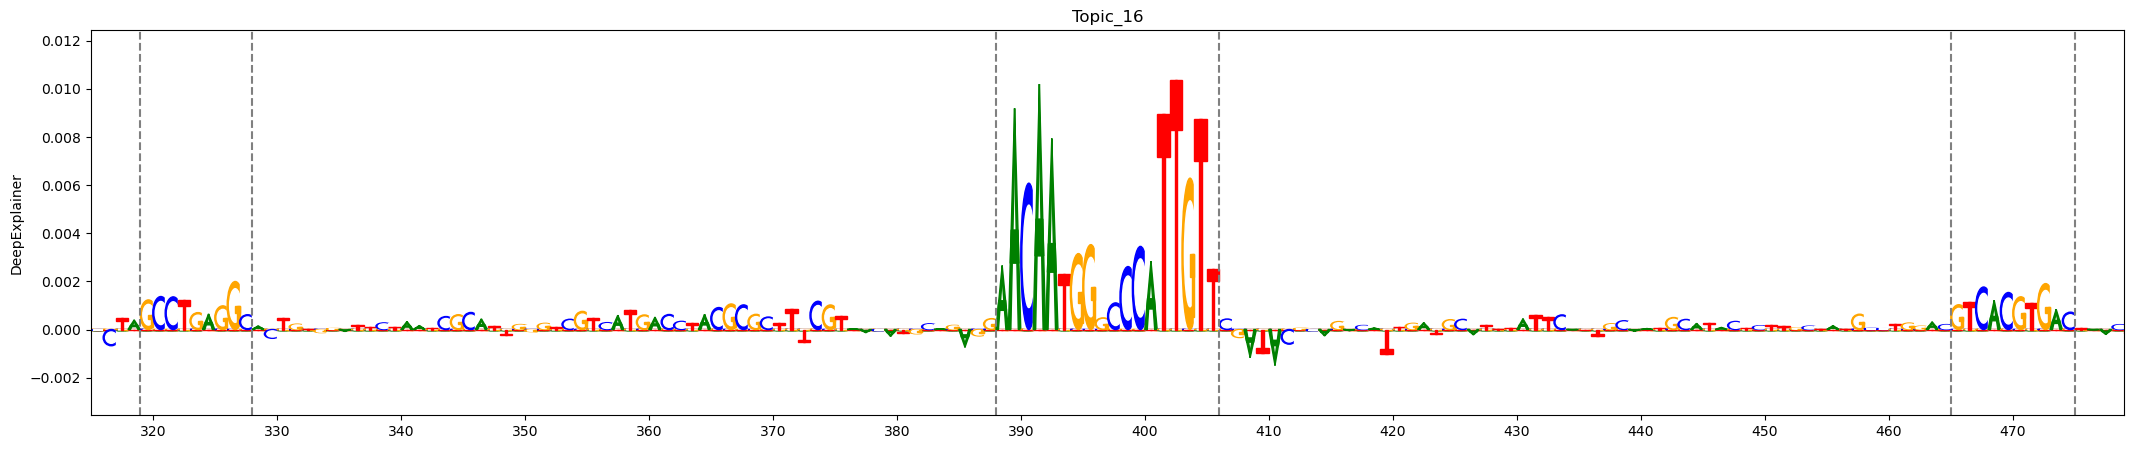

In [80]:
ori_index = 58
st = 315
end = 479

ntrack = 1
fig = plt.figure(figsize=(80/500*(end-st),ntrack*5))

onehot_  = np.copy(motif_embedding_dict["smt"]["regions"][ori_index:ori_index+1])
ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=onehot_, class_no = 16)

ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["sm"]["locations"][ori_index]+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["smt"]["locations"][ori_index]+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")

ax1.set_xlim([st,end])
plt.savefig("figures/motif_embedding/ME4_cut_st"+str(st)+"_end"+str(end)+"_deepexplainer_topic16.pdf",transparent=True)

GTAAGCCTGAGGCGAACAATGGGCCCATTGTTCGATAGTCACGTGACGATG

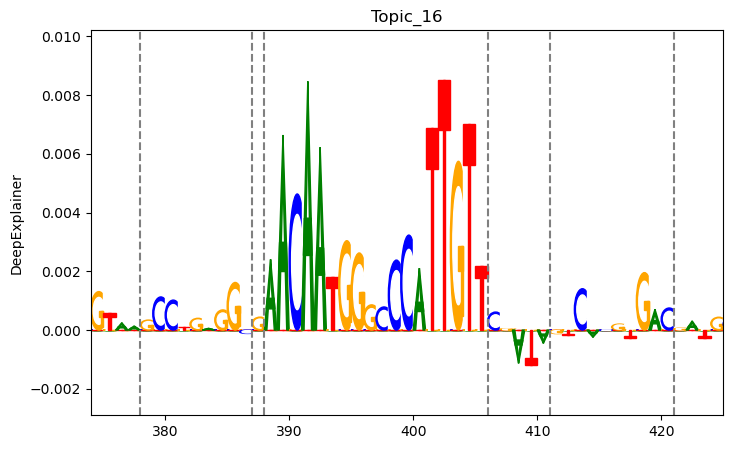

In [81]:
ori_index = 58
onehot_ = np.copy(motif_embedding_dict["s"]["regions"][ori_index:ori_index+1])
res_mitf = add_pattern_to_every(patterns_dict["mitf"], onehot_, model_dict["deepmel2"], topic=16)
onehot_ = np.copy(res_mitf["tmp_array"][411:411+1])
res_tfap = add_pattern_to_every(patterns_dict["tfap2"], onehot_, model_dict["deepmel2"], topic=16)
onehot_ = np.copy(res_tfap["tmp_array"][378:378+1])
st = 378 - 4
end = 411 + 10 + 4

ntrack = 1
fig = plt.figure(figsize=(80/500*(end-st),ntrack*5))
ax1 = utils.plot_deepexplainer_givenax_withrc(explainer=exp_dict["deepmel2"], fig=fig, ntrack=ntrack, track_no=1, seq_onehot=onehot_, class_no = 16)

ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index],linestyle="--",color="gray")
ax1.axvline(x=motif_embedding_dict["s"]["locations"][ori_index]+patterns_dict["sox10"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=411,linestyle="--",color="gray")
ax1.axvline(x=411+patterns_dict["mitf"].shape[1],linestyle="--",color="gray")

ax1.axvline(x=378,linestyle="--",color="gray")
ax1.axvline(x=378+patterns_dict["tfap2"].shape[1],linestyle="--",color="gray")

ax1.set_xlim([st,end])
plt.savefig("figures/motif_embedding/ME4_shortened_st"+str(st)+"_end"+str(end)+"_deepexplainer_topic16.pdf",transparent=True)

for nuc in onehot_[0][st:end]:
    if nuc[0]==1:
        print("A",end="")
    if nuc[1]==1:
        print("C",end="")
    if nuc[2]==1:
        print("G",end="")
    if nuc[3]==1:
        print("T",end="")

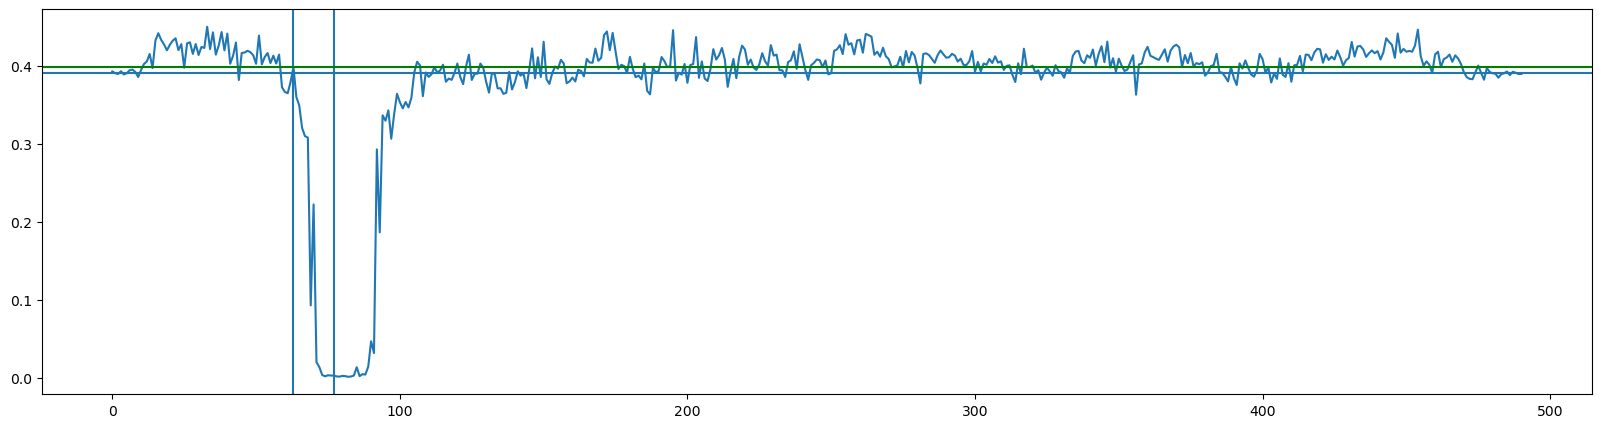

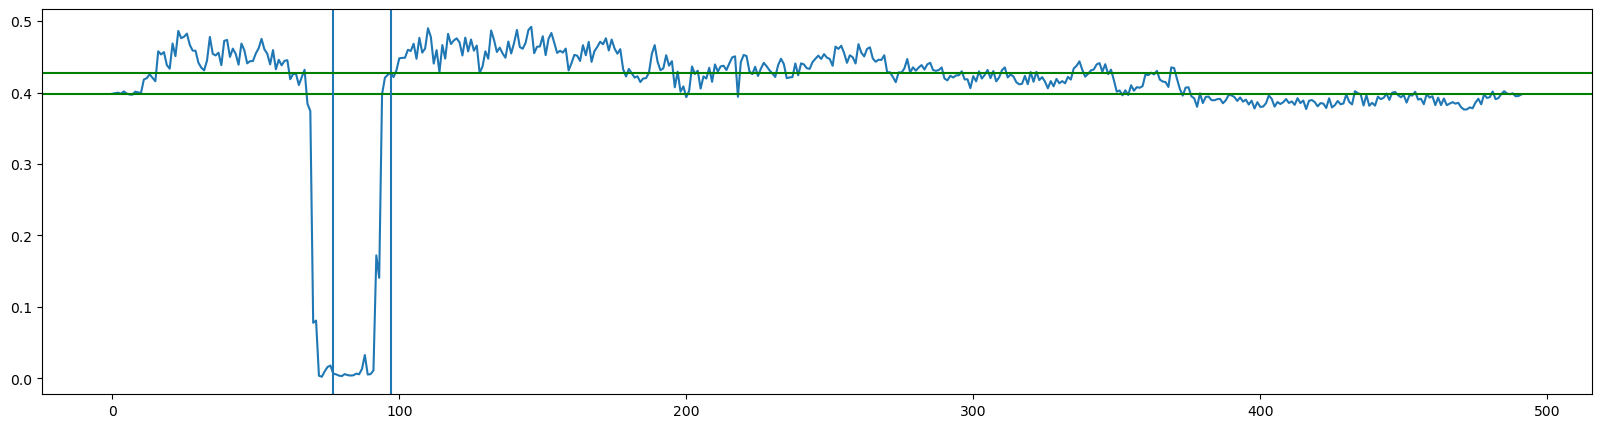

In [86]:
Topic = 16
ori_index = 1

onehot_ = np.copy(motif_embedding_dict["s"]["regions"][ori_index:ori_index+1])
res_mitf = add_pattern_to_every(patterns_dict["mitf"], onehot_, model_dict["deepmel2"], topic=16)

plt.figure(figsize=(20,5))
plt.plot(res_mitf["prediction"])
plt.axhline(y=model_dict["deepmel2"].predict([onehot_,onehot_[:,::-1,::-1]])[0,Topic-1])
plt.axvline(x=77)
plt.axvline(x=63)
plt.axhline(y=res_mitf["prediction"][63],color="green")
plt.plot()


onehot_ = np.copy(res_mitf["tmp_array"][63:63+1])
res_tfap = add_pattern_to_every(patterns_dict["tfap2"], onehot_, model_dict["deepmel2"], topic=16)

plt.figure(figsize=(20,5))
plt.plot(res_tfap["prediction"])
plt.axhline(y=res_mitf["prediction"][63],color="green")

plt.axvline(x=77)
plt.axvline(x=97)
plt.axhline(y=res_tfap["prediction"][97],color="green")

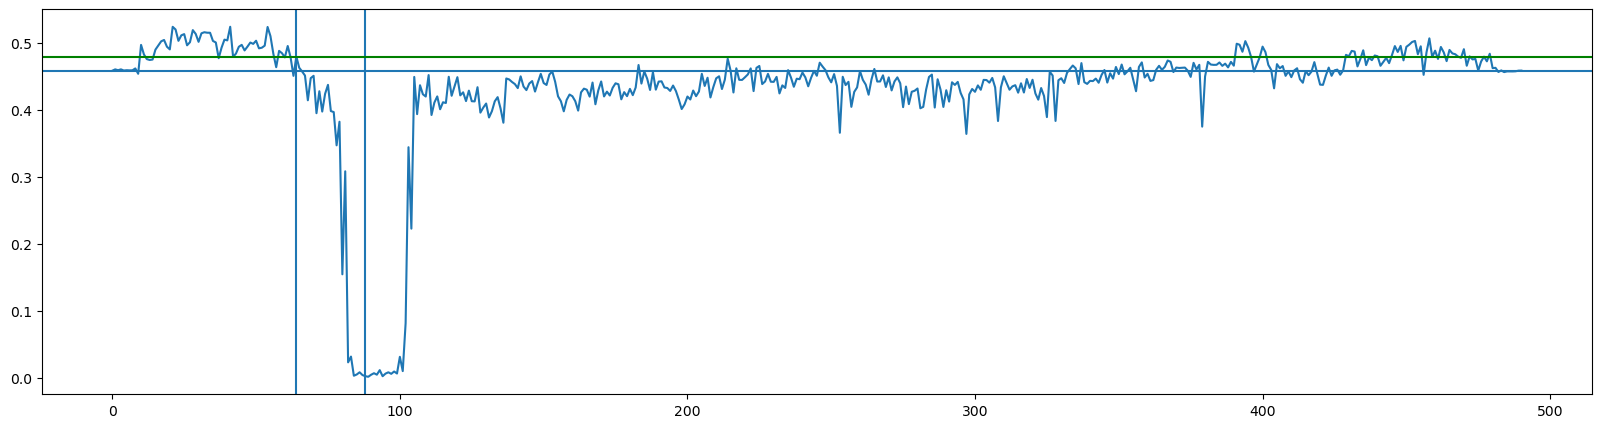

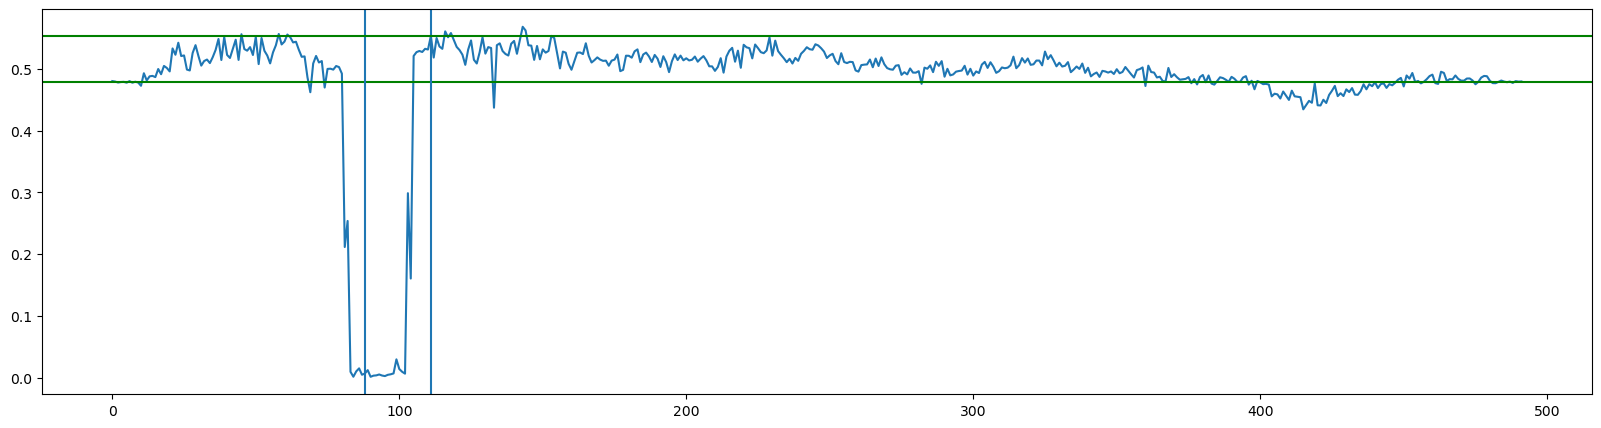

In [87]:
Topic = 16
ori_index = 12

onehot_ = np.copy(motif_embedding_dict["s"]["regions"][ori_index:ori_index+1])
res_mitf = add_pattern_to_every(patterns_dict["mitf"], onehot_, model_dict["deepmel2"], topic=16)

plt.figure(figsize=(20,5))
plt.plot(res_mitf["prediction"])
plt.axhline(y=model_dict["deepmel2"].predict([onehot_,onehot_[:,::-1,::-1]])[0,Topic-1])
plt.axvline(x=88)
plt.axvline(x=64)
plt.axhline(y=res_mitf["prediction"][64],color="green")
plt.plot()


onehot_ = np.copy(res_mitf["tmp_array"][64:64+1])
res_tfap = add_pattern_to_every(patterns_dict["tfap2"], onehot_, model_dict["deepmel2"], topic=16)

plt.figure(figsize=(20,5))
plt.plot(res_tfap["prediction"])
plt.axhline(y=res_mitf["prediction"][64],color="green")

plt.axvline(x=88)
plt.axvline(x=111)
plt.axhline(y=res_tfap["prediction"][111],color="green")


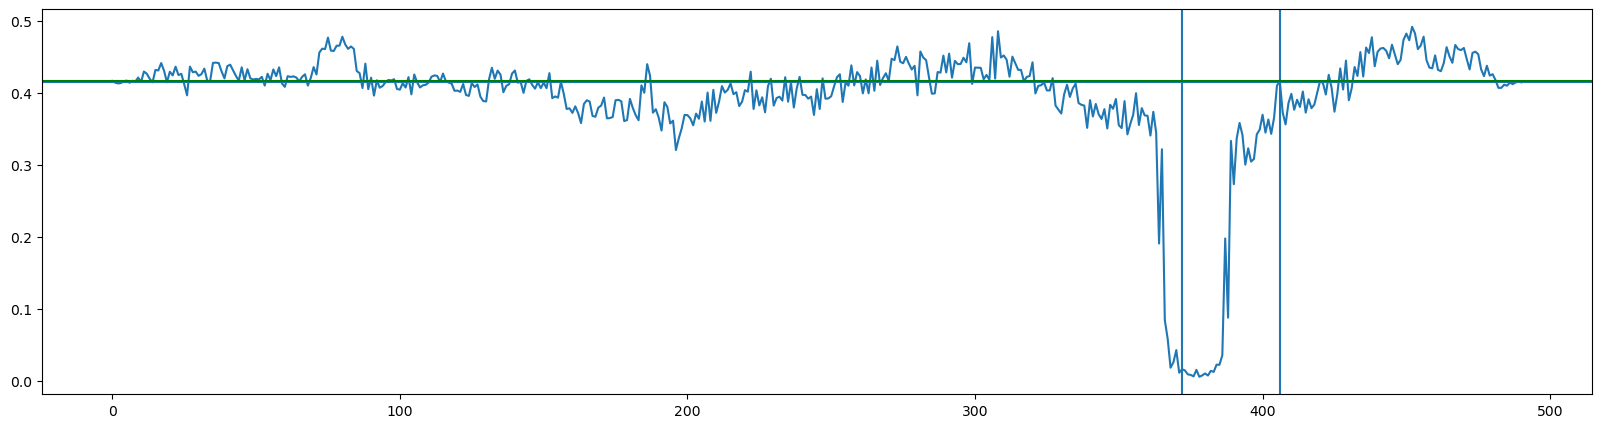

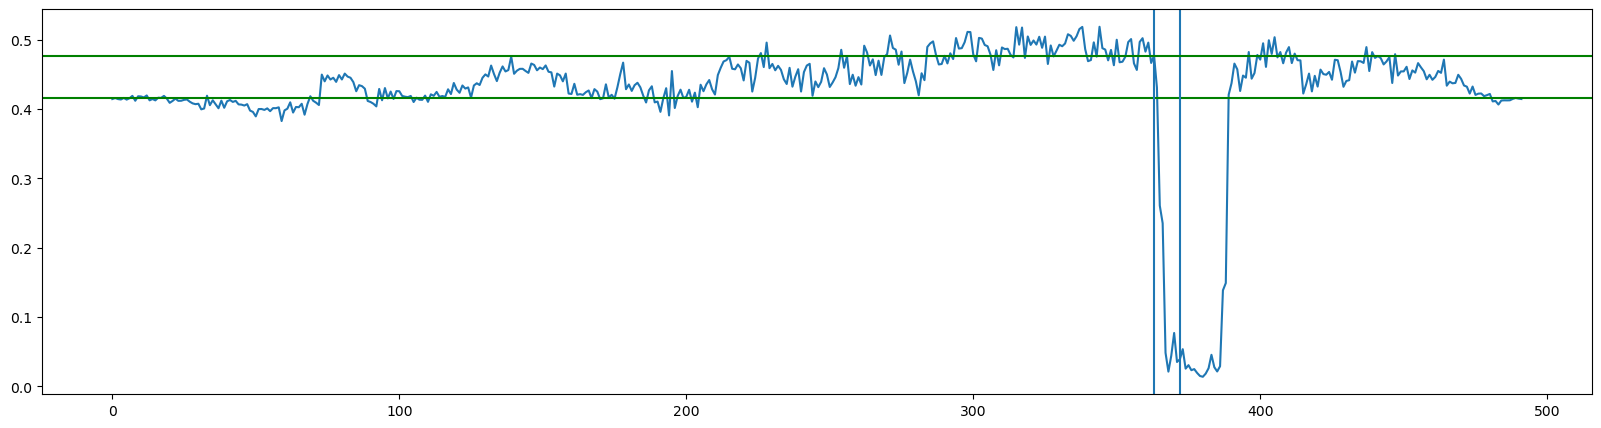

In [88]:
Topic = 16
ori_index = 17

onehot_ = np.copy(motif_embedding_dict["s"]["regions"][ori_index:ori_index+1])
res_mitf = add_pattern_to_every(patterns_dict["mitf"], onehot_, model_dict["deepmel2"], topic=16)

plt.figure(figsize=(20,5))
plt.plot(res_mitf["prediction"])
plt.axhline(y=model_dict["deepmel2"].predict([onehot_,onehot_[:,::-1,::-1]])[0,Topic-1])
plt.axvline(x=372)
plt.axvline(x=406)
plt.axhline(y=res_mitf["prediction"][406],color="green")
plt.plot()


onehot_ = np.copy(res_mitf["tmp_array"][406:406+1])
res_tfap = add_pattern_to_every(patterns_dict["tfap2"], onehot_, model_dict["deepmel2"], topic=16)

plt.figure(figsize=(20,5))
plt.plot(res_tfap["prediction"])
plt.axhline(y=res_mitf["prediction"][406],color="green")

plt.axvline(x=372)
plt.axvline(x=363)
plt.axhline(y=res_tfap["prediction"][363],color="green")


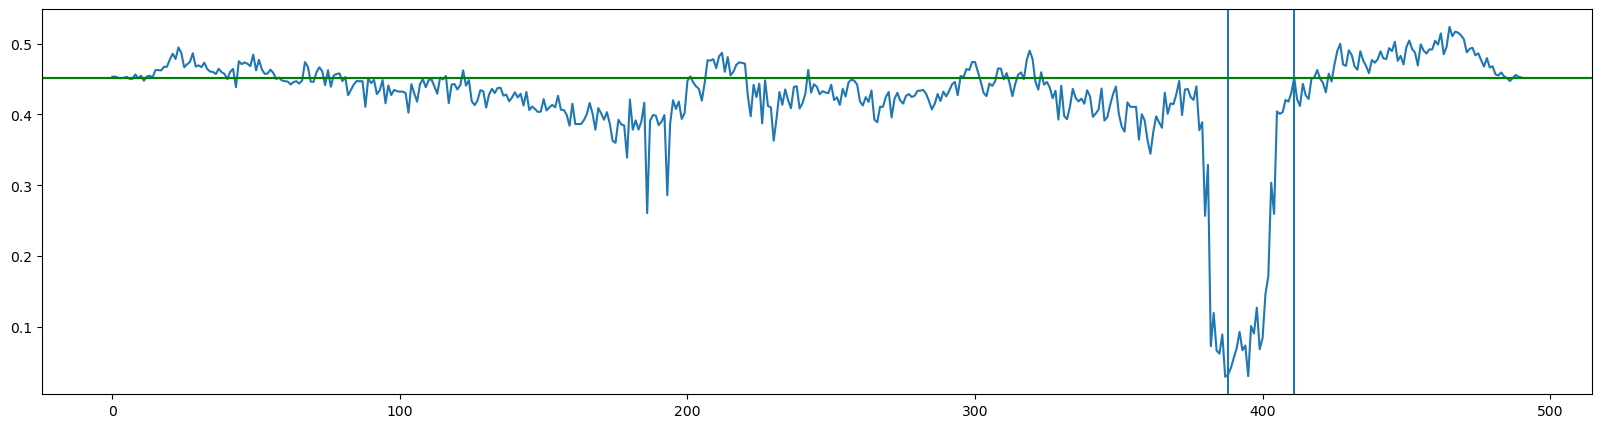

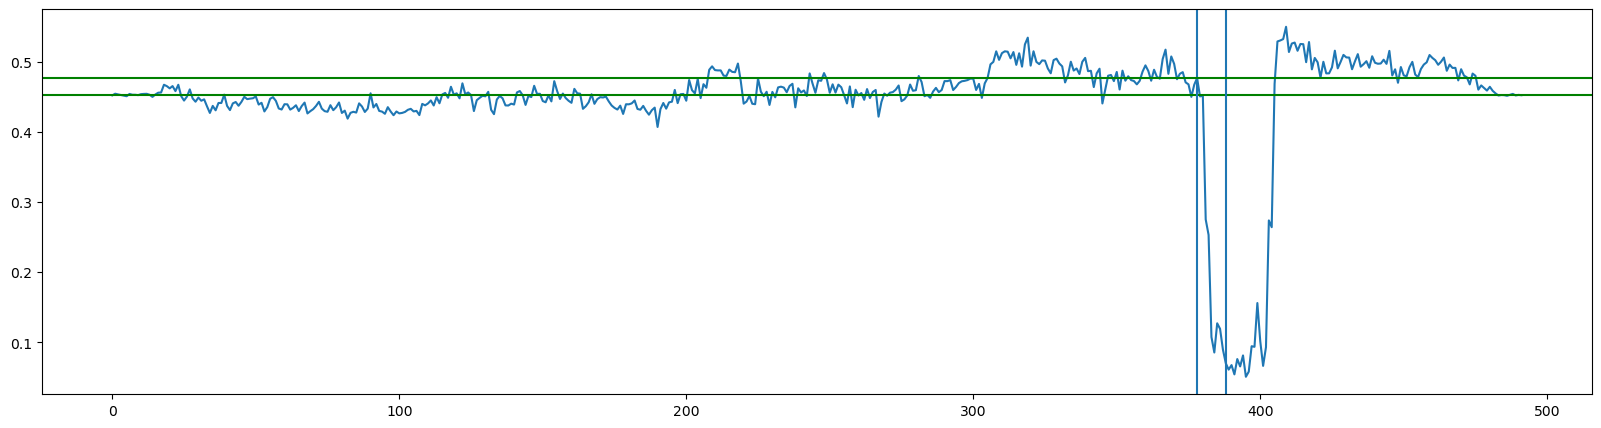

In [89]:
Topic = 16
ori_index = 58

onehot_ = np.copy(motif_embedding_dict["s"]["regions"][ori_index:ori_index+1])
res_mitf = add_pattern_to_every(patterns_dict["mitf"], onehot_, model_dict["deepmel2"], topic=16)

plt.figure(figsize=(20,5))
plt.plot(res_mitf["prediction"])
plt.axhline(y=model_dict["deepmel2"].predict([onehot_,onehot_[:,::-1,::-1]])[0,Topic-1])
plt.axvline(x=388)
plt.axvline(x=411)
plt.axhline(y=res_mitf["prediction"][411],color="green")
plt.plot()


onehot_ = np.copy(res_mitf["tmp_array"][411:411+1])
res_tfap = add_pattern_to_every(patterns_dict["tfap2"], onehot_, model_dict["deepmel2"], topic=16)

plt.figure(figsize=(20,5))
plt.plot(res_tfap["prediction"])
plt.axhline(y=res_mitf["prediction"][411],color="green")

plt.axvline(x=388)
plt.axvline(x=378)
plt.axhline(y=res_tfap["prediction"][378],color="green")


### Loading and plotting luciferase results

In [90]:
luciferase_dict = {"ids":[],"values":[]}
with open("data/motif_embedding/luciferase_ME_with_genomics.txt","r") as fr:
    for line in fr:
        if line.startswith("id"):
            continue
        sep = line.strip().split("\t")
        luciferase_dict["ids"].append(sep[0])
        luciferase_dict["values"].append(sep[1:])
luciferase_dict["values"] = np.array(luciferase_dict["values"],dtype="float")

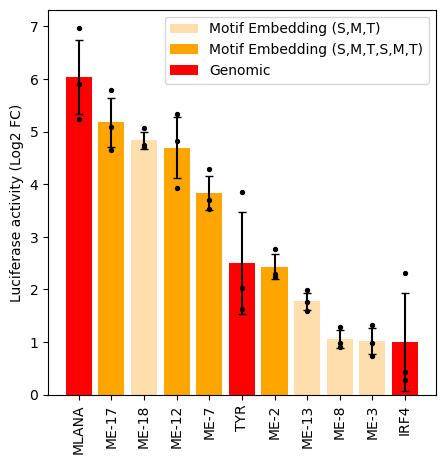

In [91]:
plt.figure(figsize=(5,5))
mean = np.mean(np.log2(luciferase_dict["values"]),axis=1)
std = np.std(np.log2(luciferase_dict["values"]),axis=1)

index = np.argsort(mean)[::-1]
temp = sorted(mean)[::-1]
res = [temp.index(i) for i in mean]

plt.bar(res[:4],mean[:4],color="navajowhite",label="Motif Embedding (S,M,T)",yerr=std[:4],capsize=3)
plt.bar(res[4:8],mean[4:8],color="orange",label="Motif Embedding (S,M,T,S,M,T)",yerr=std[4:8],capsize=3)
plt.bar(res[8:],mean[8:],color="red",label="Genomic",yerr=std[8:],capsize=3)
plt.legend()

for i in range(11):
    for k in np.log2(luciferase_dict["values"][i]):
        plt.scatter(res[i],k,color="black",zorder=10,s=8)
    
    
_ = plt.xticks(range(11),np.array(luciferase_dict["ids"])[index],rotation=90)
plt.ylabel("Luciferase activity (Log2 FC)")
plt.savefig("figures/motif_embedding/genomic_single_double_motif_luciferase_withdot.pdf",transparent=True,dpi=300)


In [92]:
luciferase_dict = {"ids":[],"values":[]}
with open("data/motif_embedding/luciferase_ME.txt","r") as fr:
    for line in fr:
        if line.startswith("id"):
            continue
        sep = line.strip().split("\t")
        luciferase_dict["ids"].append(sep[0])
        luciferase_dict["values"].append(sep[1:])
luciferase_dict["values"] = np.array(luciferase_dict["values"],dtype="float")

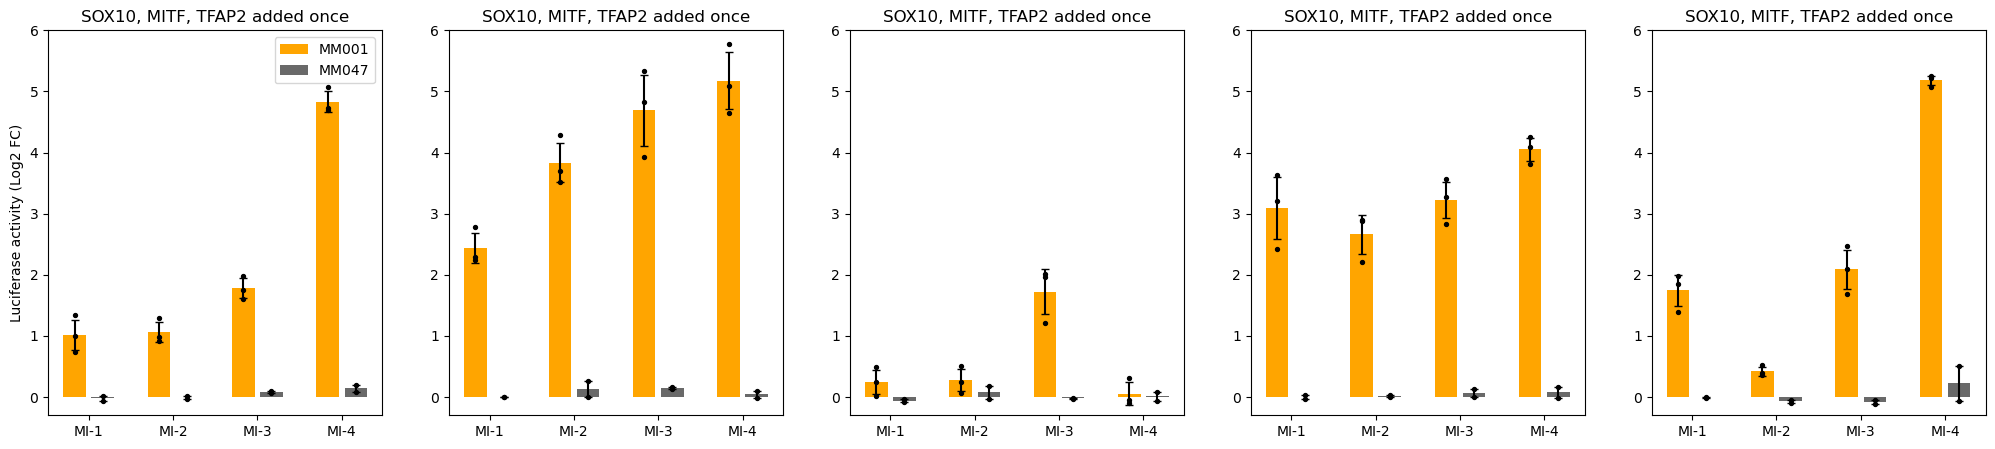

In [94]:
fig = plt.figure(figsize=(25,5))

selected = [2,7,12,17]

for f,selected in enumerate([[2,7,12,17],[1,6,11,16],[0,5,10,15],[3,8,13,18],[4,9,14,19]]):
    ax = fig.add_subplot(1,5,f+1)
    mean_mm = np.mean(np.log2(luciferase_dict["values"][selected,:3]),axis=1)
    std_mm = np.std(np.log2(luciferase_dict["values"][selected,:3]),axis=1)
    mean_mm47 = np.mean(np.log2(luciferase_dict["values"][selected,3:5]),axis=1)
    std_mm47 = np.std(np.log2(luciferase_dict["values"][selected,3:5]),axis=1)
    index = np.argsort(mean_mm)[::-1]
    temp = sorted(mean_mm)[::-1]
    res = [temp.index(i) for i in mean_mm]
    for i, pos in enumerate(res):
        if i == 0:
            plt.bar((3*i),mean_mm[i],color="orange",label="MM001",yerr=std_mm[i],capsize=3)
            plt.bar((3*i)+1,mean_mm47[i],color="dimgray",label="MM047",yerr=std_mm47[i],capsize=3)
            for k in np.log2(luciferase_dict["values"][selected,:3][i]):
                plt.scatter((3*i),k,color="black",zorder=10,s=8)
            for k in np.log2(luciferase_dict["values"][selected,3:5][i]):
                plt.scatter((3*i+1),k,color="black",zorder=10,s=8)
        else:
            plt.bar((3*i),mean_mm[i],color="orange",yerr=std_mm[i],capsize=3)
            plt.bar((3*i)+1,mean_mm47[i],color="dimgray",yerr=std_mm47[i],capsize=3)
            for k in np.log2(luciferase_dict["values"][selected,:3][i]):
                plt.scatter((3*i),k,color="black",zorder=10,s=8)
            for k in np.log2(luciferase_dict["values"][selected,3:5][i]):
                plt.scatter((3*i+1),k,color="black",zorder=10,s=8)
    if f ==0:
        plt.legend()
        plt.ylabel("Luciferase activity (Log2 FC)")
    plt.ylim(-0.3,6)
    _ = plt.xticks(np.array(list(range(1,12,3)))-0.5,np.array(["MI-1","MI-2","MI-3","MI-4"]))
    plt.title("SOX10, MITF, TFAP2 added once")
plt.savefig("figures/motif_embedding/single_motif_luciferase_with_control_withdots.pdf",transparent=True,dpi=300)
